20153029 Minji Kim

# [K-means clustering on the spatial domain]

Apply K-means algorithm to the regular grid of a spatial domain in two dimension with varying number of clusters.

The spatial domain can be represented by two matrices where one matrix represents the horizontal index and the other matrix represents the vertical index.

Define a distance between each spatial point $(x_i, y_i)$ and a centroid $(c_x^k, c_y^k)$ for cluster k using L2-norm square and L1-norm. $(K = 4, 10, 50)$

Visualize the result using color coding scheme that distinguishes different clusters.

Observe the trajectory of centroid during the optimization and the shape of the clusters depending on the distance.


## Trajectory of Centroids & Visualization of Output

### K = 4 (L1-norm)


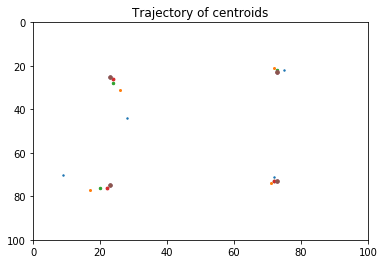

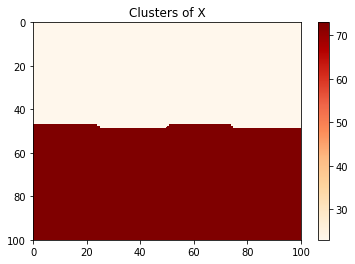

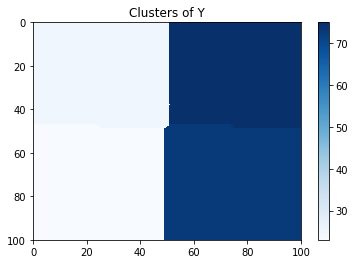

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import random
from collections import Counter
from math import sqrt

#
# Domain of pixels
#
pixel_idx = np.empty((10000,2),dtype = int)     # img size = 100 * 100
for i in range(100):
    for j in range(100):
        pixel_idx[j+i*100,0] = i                # index of x
        pixel_idx[j+i*100,1] = j                # index of y

num_pixel = len(pixel_idx)



#
# Distance function between two vectors x and y
#
def L1_distance(x, y):
    d = abs(x - y)
    s = np.sum(d)
    return(s)

def L2_distance(x, y):
    d = (x - y) ** 2
    s = np.sum(d)
    return(s)



#
# k-mean fuction
#

def getCentroids(pixel, labels, k):
    idx = np.argsort(labels)
    labels = labels[idx]
    pixel = pixel[idx,:]

    label_count = [0,]
    result = Counter(labels)
    for i in range(k):
        label_count.append(result[i])
    
    label_cumsum = []
    cumsum = 0
    for i in range(k+1): 
        cumsum += label_count[i]
        label_cumsum.append(cumsum)
    centroids = np.empty((k,2), dtype=int)
    
    for i in range(k):
        centroids[i,:] = np.sum(pixel[label_cumsum[i]:label_cumsum[i+1],:], axis=0) / label_count[i+1]
    return centroids

def getLabels_L1(pixel, centroids, k):
    labels  = np.empty(num_pixel, dtype=int)
    for i in range(num_pixel):
        d = []
        for j in range(k):
            d.append(L1_distance(pixel[i,:], centroids[j,:]))
        labels[i] = np.argmin(d)
    return labels

def getLabels_L2(pixel, centroids, k):
    labels  = np.empty(num_pixel, dtype=int)
    for i in range(num_pixel):
        d = []
        for j in range(k):
            d.append(L2_distance(pixel[i,:], centroids[j,:]))
        labels[i] = np.argmin(d)
    return labels



#
# K-means clustering
#

k = 4

# Initialize centroids randomly
centroids = pixel_idx[random.sample(range(num_pixel),k),:]

iterations = 0
oldCentroids = 0

while not np.all(oldCentroids == centroids):
    oldCentroids = centroids
    iterations += 1

    # Assign labels to each datapoint based on centroids and compute energies
    labels = getLabels_L1(pixel_idx, centroids, k)
    
    # Assign centroids based on datapoint labels
    centroids = getCentroids(pixel_idx, labels, k)
    plt.scatter(centroids[:,0],centroids[:,1], s=iterations*2)
    
plt.axis([0,100,100,0])
plt.title("Trajectory of centroids")
plt.show()

# Visualization of output
out_x = np.empty(num_pixel, dtype=int)
out_y = np.empty(num_pixel, dtype=int)
for i in range(num_pixel):
    out_x[i] = centroids[labels[i],0]
    out_y[i] = centroids[labels[i],1]
out_x = out_x.reshape((100, 100))
out_y = out_y.reshape((100, 100))

plt.pcolor(out_x, cmap = "OrRd")
plt.colorbar()
plt.axis([0,100,100,0])
plt.title("Clusters of X")
plt.show()

plt.pcolor(out_y, cmap = "Blues")
plt.axis([0,100,100,0])
plt.colorbar()
plt.title("Clusters of Y")
plt.show()


### K = 4 (L2-norm)

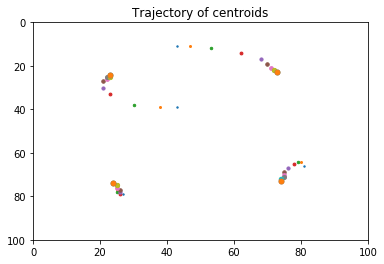

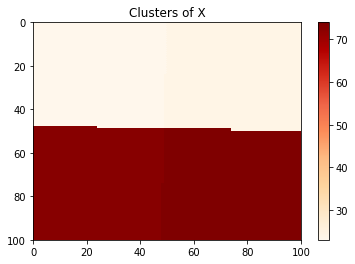

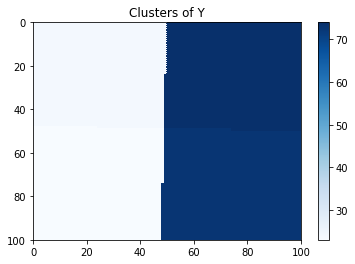

In [5]:
#
# K-means clustering
#

k = 4

# Initialize centroids randomly
centroids = pixel_idx[random.sample(range(num_pixel),k),:]

iterations = 0
oldCentroids = 0

while not np.all(oldCentroids == centroids):
    oldCentroids = centroids
    iterations += 1

    # Assign labels to each datapoint based on centroids and compute energies
    labels = getLabels_L2(pixel_idx, centroids, k)
    
    # Assign centroids based on datapoint labels
    centroids = getCentroids(pixel_idx, labels, k)
    plt.scatter(centroids[:,0],centroids[:,1], s=iterations*2)
    
plt.axis([0,100,100,0])
plt.title("Trajectory of centroids")
plt.show()

# Visualization of output
out_x = np.empty(num_pixel, dtype=int)
out_y = np.empty(num_pixel, dtype=int)
for i in range(num_pixel):
    out_x[i] = centroids[labels[i],0]
    out_y[i] = centroids[labels[i],1]
out_x = out_x.reshape((100, 100))
out_y = out_y.reshape((100, 100))

plt.pcolor(out_x, cmap = "OrRd")
plt.colorbar()
plt.axis([0,100,100,0])
plt.title("Clusters of X")
plt.show()

plt.pcolor(out_y, cmap = "Blues")
plt.axis([0,100,100,0])
plt.colorbar()
plt.title("Clusters of Y")
plt.show()


### K=10 (L1-norm)

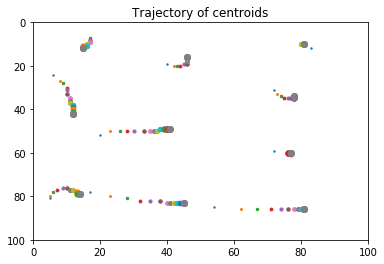

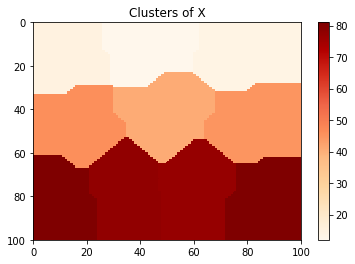

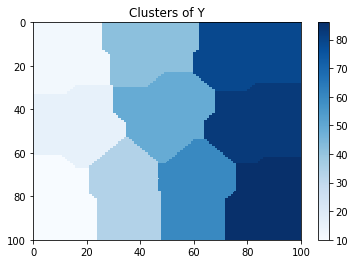

In [7]:
#
# K-means clustering
#

k = 10

# Initialize centroids randomly
centroids = pixel_idx[random.sample(range(num_pixel),k),:]

iterations = 0
oldCentroids = 0

while not np.all(oldCentroids == centroids):
    oldCentroids = centroids
    iterations += 1

    # Assign labels to each datapoint based on centroids and compute energies
    labels = getLabels_L1(pixel_idx, centroids, k)
    
    # Assign centroids based on datapoint labels
    centroids = getCentroids(pixel_idx, labels, k)
    plt.scatter(centroids[:,0],centroids[:,1], s=iterations*2)
    
plt.axis([0,100,100,0])
plt.title("Trajectory of centroids")
plt.show()

# Visualization of output
out_x = np.empty(num_pixel, dtype=int)
out_y = np.empty(num_pixel, dtype=int)
for i in range(num_pixel):
    out_x[i] = centroids[labels[i],0]
    out_y[i] = centroids[labels[i],1]
out_x = out_x.reshape((100, 100))
out_y = out_y.reshape((100, 100))

plt.pcolor(out_x, cmap = "OrRd")
plt.colorbar()
plt.axis([0,100,100,0])
plt.title("Clusters of X")
plt.show()

plt.pcolor(out_y, cmap = "Blues")
plt.axis([0,100,100,0])
plt.colorbar()
plt.title("Clusters of Y")
plt.show()


### K=10 (L2-norm)

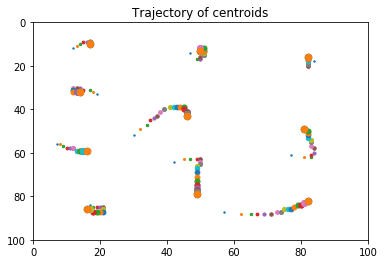

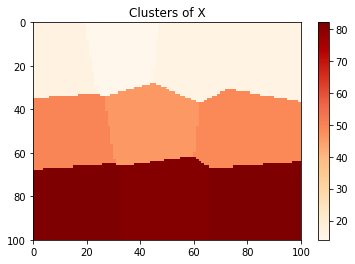

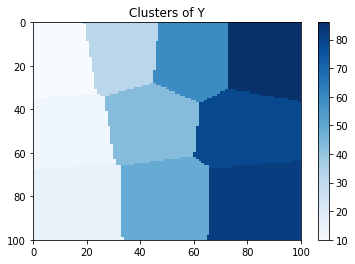

In [8]:
#
# K-means clustering
#

k = 10

# Initialize centroids randomly
centroids = pixel_idx[random.sample(range(num_pixel),k),:]

iterations = 0
oldCentroids = 0

while not np.all(oldCentroids == centroids):
    oldCentroids = centroids
    iterations += 1

    # Assign labels to each datapoint based on centroids and compute energies
    labels = getLabels_L2(pixel_idx, centroids, k)
    
    # Assign centroids based on datapoint labels
    centroids = getCentroids(pixel_idx, labels, k)
    plt.scatter(centroids[:,0],centroids[:,1], s=iterations*2)
    
plt.axis([0,100,100,0])
plt.title("Trajectory of centroids")
plt.show()

# Visualization of output
out_x = np.empty(num_pixel, dtype=int)
out_y = np.empty(num_pixel, dtype=int)
for i in range(num_pixel):
    out_x[i] = centroids[labels[i],0]
    out_y[i] = centroids[labels[i],1]
out_x = out_x.reshape((100, 100))
out_y = out_y.reshape((100, 100))

plt.pcolor(out_x, cmap = "OrRd")
plt.colorbar()
plt.axis([0,100,100,0])
plt.title("Clusters of X")
plt.show()

plt.pcolor(out_y, cmap = "Blues")
plt.axis([0,100,100,0])
plt.colorbar()
plt.title("Clusters of Y")
plt.show()


### K=50 (L1-norm)

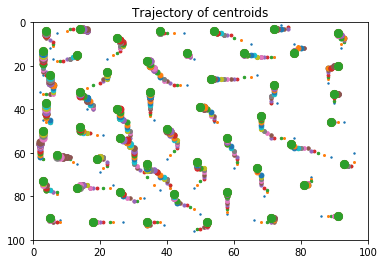

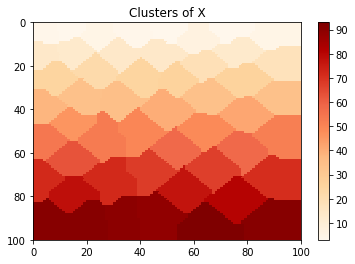

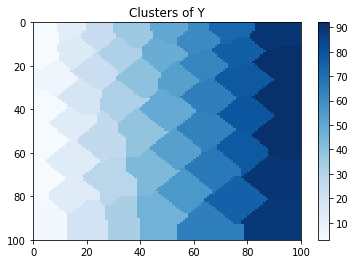

In [9]:
#
# K-means clustering
#

k = 50

# Initialize centroids randomly
centroids = pixel_idx[random.sample(range(num_pixel),k),:]

iterations = 0
oldCentroids = 0

while not np.all(oldCentroids == centroids):
    oldCentroids = centroids
    iterations += 1

    # Assign labels to each datapoint based on centroids and compute energies
    labels = getLabels_L1(pixel_idx, centroids, k)
    
    # Assign centroids based on datapoint labels
    centroids = getCentroids(pixel_idx, labels, k)
    plt.scatter(centroids[:,0],centroids[:,1], s=iterations*2)
    
plt.axis([0,100,100,0])
plt.title("Trajectory of centroids")
plt.show()

# Visualization of output
out_x = np.empty(num_pixel, dtype=int)
out_y = np.empty(num_pixel, dtype=int)
for i in range(num_pixel):
    out_x[i] = centroids[labels[i],0]
    out_y[i] = centroids[labels[i],1]
out_x = out_x.reshape((100, 100))
out_y = out_y.reshape((100, 100))

plt.pcolor(out_x, cmap = "OrRd")
plt.colorbar()
plt.axis([0,100,100,0])
plt.title("Clusters of X")
plt.show()

plt.pcolor(out_y, cmap = "Blues")
plt.axis([0,100,100,0])
plt.colorbar()
plt.title("Clusters of Y")
plt.show()


### K=50 (L2-norm)

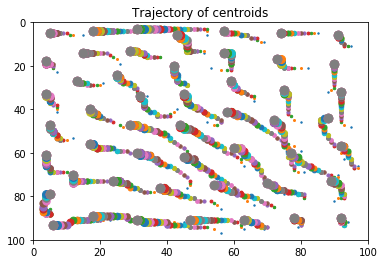

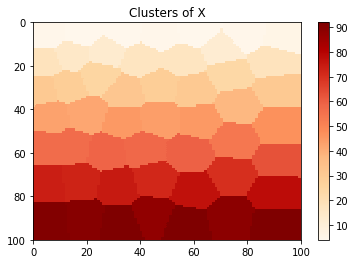

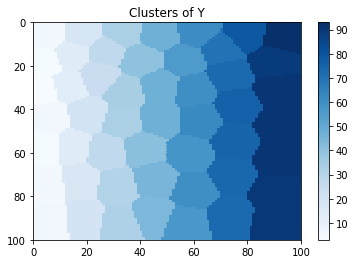

In [10]:
#
# K-means clustering
#

k = 50

# Initialize centroids randomly
centroids = pixel_idx[random.sample(range(num_pixel),k),:]

iterations = 0
oldCentroids = 0

while not np.all(oldCentroids == centroids):
    oldCentroids = centroids
    iterations += 1

    # Assign labels to each datapoint based on centroids and compute energies
    labels = getLabels_L2(pixel_idx, centroids, k)
    
    # Assign centroids based on datapoint labels
    centroids = getCentroids(pixel_idx, labels, k)
    plt.scatter(centroids[:,0],centroids[:,1], s=iterations*2)
    
plt.axis([0,100,100,0])
plt.title("Trajectory of centroids")
plt.show()

# Visualization of output
out_x = np.empty(num_pixel, dtype=int)
out_y = np.empty(num_pixel, dtype=int)
for i in range(num_pixel):
    out_x[i] = centroids[labels[i],0]
    out_y[i] = centroids[labels[i],1]
out_x = out_x.reshape((100, 100))
out_y = out_y.reshape((100, 100))

plt.pcolor(out_x, cmap = "OrRd")
plt.colorbar()
plt.axis([0,100,100,0])
plt.title("Clusters of X")
plt.show()

plt.pcolor(out_y, cmap = "Blues")
plt.axis([0,100,100,0])
plt.colorbar()
plt.title("Clusters of Y")
plt.show()
